### Data pre-processing data using scikit learn  : Day 03 : 12/12/2022

In [93]:
import  numpy as np 
import pandas as pd 
import matplotlib.pylab as plt
import seaborn as sns 
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import QuantileTransformer 
from sklearn.pipeline import Pipeline 
from sklearn.neighbors import KNeighborsClassifier 


In [95]:
df = pd.read_csv('drawndata1.csv')
df.sample(5)

,x,y,z
223,2561.350598,241.202208,b
71,442.750886,310.583352,a
207,2487.845241,204.934981,b
18,237.558919,177.092071,a
26,207.913763,281.506442,a


In [96]:
X=df[['x','y']]
y = df['z']=='a'

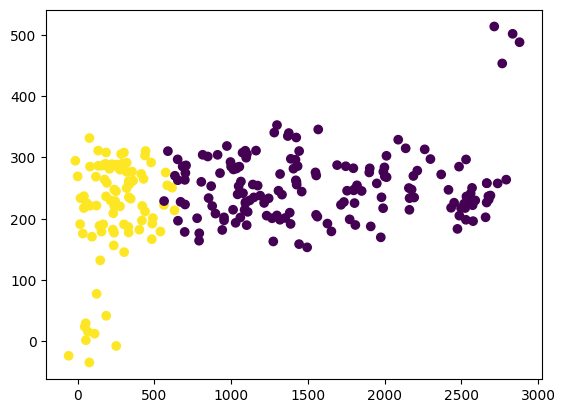

In [97]:
#Yellow ones are Biryani lover
plt.scatter(X['x'],X['y'],c=y)

In [98]:

scaled_X = StandardScaler().fit_transform(X)

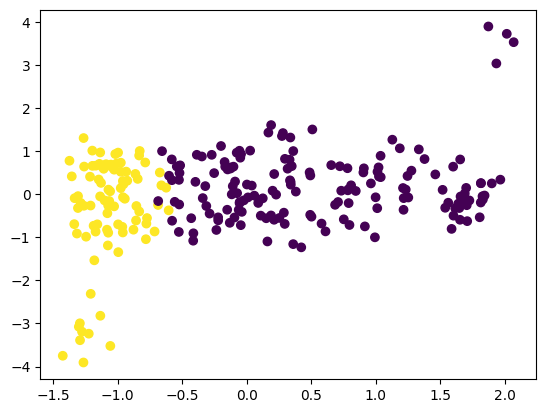

In [99]:
#scalling data
plt.scatter(scaled_X[:,0],scaled_X[:,1],c=y)

(array([[ 42.,  39.,  25.,  33.,  25.,  18.,  20.,  14.,  22.,  14.],
        [117., 135.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]]),
 array([ -58.79612377,  235.09053019,  528.97718416,  822.86383812,
        1116.75049209, 1410.63714605, 1704.52380002, 1998.41045398,
        2292.29710794, 2586.18376191, 2880.07041587]),
 <a list of 2 BarContainer objects>)

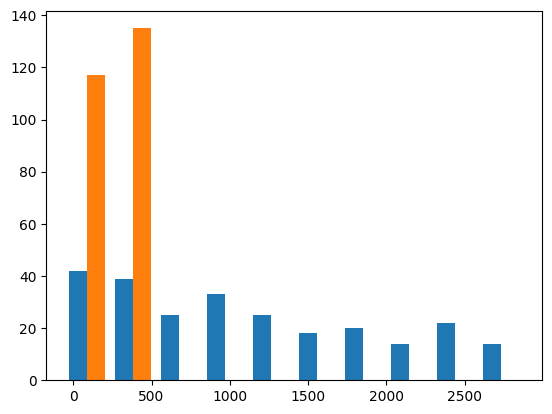

In [100]:
plt.hist(X )

(array([[ 0.,  0.,  0., 77., 63., 47., 33., 32.,  0.,  0.],
        [ 6.,  3.,  1., 22., 92., 90., 33.,  1.,  1.,  3.]]),
 array([-3.90650514, -3.12642651, -2.34634789, -1.56626927, -0.78619064,
        -0.00611202,  0.7739666 ,  1.55404523,  2.33412385,  3.11420247,
         3.89428109]),
 <a list of 2 BarContainer objects>)

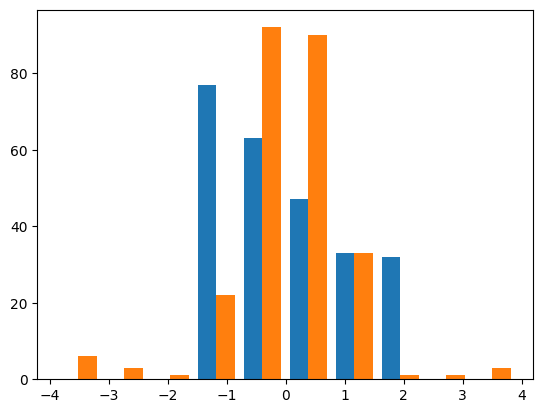

In [101]:
#after scalling data
plt.hist(scaled_X )

In [102]:
#MIn MAx
scaled_X1 = MinMaxScaler().fit_transform(X)

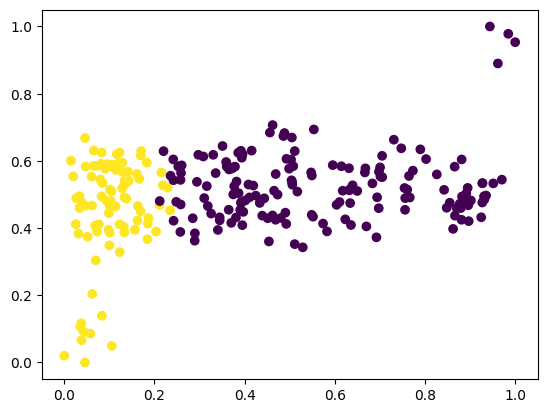

In [103]:
plt.scatter(scaled_X1[:,0],scaled_X1[:,1],c=y)

### Quartiles transfer to remove outlier

In [104]:
scaled_X2= QuantileTransformer().fit_transform(X)

C:\Users\Lenovo\AppData\Roaming\Python\Python310\site-packages\sklearn\preprocessing\_data.py:2583: UserWarning: n_quantiles (1000) is greater than the total number of samples (252). n_quantiles is set to n_samples.
  warnings.warn(


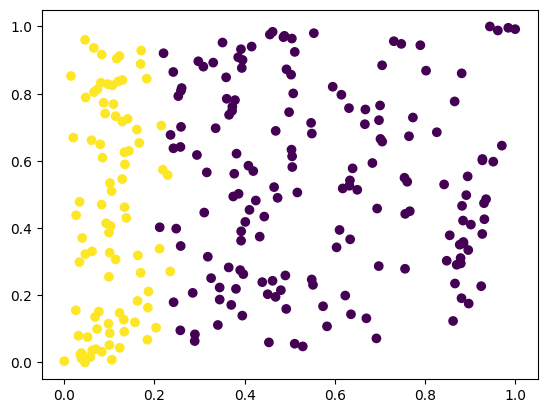

In [105]:
plt.scatter(scaled_X1[:,0],scaled_X2[:,1],c=y)

In [110]:
def plot_output(scaler):
    pipe= Pipeline([
        ('scale',scaler),
        ("model",KNeighborsClassifier())
    ])

    pred = pipe.fit(X,y).predict(X)

    plt.figure(figsize=(9,3))
    plt.subplot(131)
    plt.scatter(X['x'],X['y'],c=y)
    plt.title("Orginal Data")
    plt.subplot(132)
    X_tfm=scaler.transform(X)
    plt.scatter(X_tfm[:,0],X_tfm[:,1],c=y)
    plt.title("Transformed Data")
    plt.subplot(133)
    X_new= np.concatenate([
        np.random.uniform(0,X['x'].max(),(5000,1)),
        np.random.uniform(0,X['y'].max(),(5000,1))
    ],axis=1)
    y_proba =pipe.predict_proba(X_new)
    plt.scatter(X_new[:,0],X_new[:,1],c=y_proba[:,1],alpha=0.7)
    plt.title("Predicted Data")



C:\Users\Lenovo\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


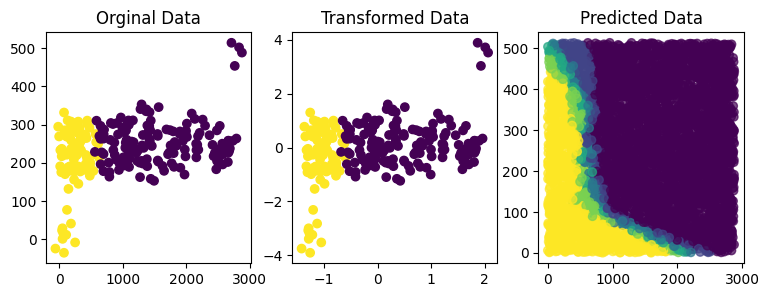

In [111]:
plot_output(scaler=StandardScaler())

C:\Users\Lenovo\AppData\Roaming\Python\Python310\site-packages\sklearn\preprocessing\_data.py:2583: UserWarning: n_quantiles (1000) is greater than the total number of samples (252). n_quantiles is set to n_samples.
  warnings.warn(
C:\Users\Lenovo\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(


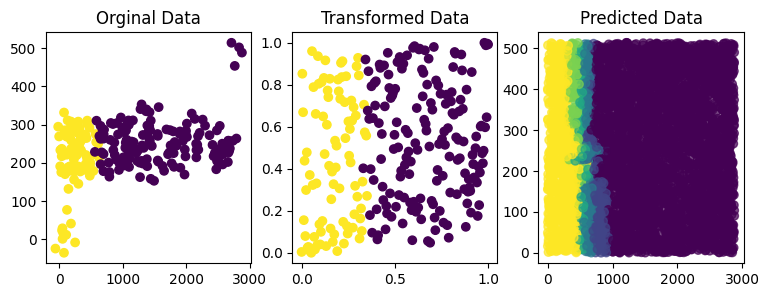

In [112]:
plot_output(scaler=QuantileTransformer())